# STEPS TO  BUILD AND EVALUATE THE MODEL

1.    Importing Libraries and Dataset.
2.    Scaling the dataset.
3.    Checking and Removing Multicollinearity
4.    Creating test and training partitions.
5.    Implementing the Models.
    a.    Multiple Linear Regression
    b.    Random Forest Regression
    c.    XGBoost Regression
6.    Generating predictions over the train and test dataset for the above models.
7.    Preparing the Residual plot.
8.    Predicting Sales Price

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

# IMPORTING PREPROCESSED DATASET

In [2]:
data = pd.read_csv("Transformed Housing Data.csv")
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


# SCALING THE DATASET

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price','ID']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price','ID']).columns)
X

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.598777,-0.337386,2.789023,-0.30579,0.340581,-0.311996,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,0.250594,-0.224356,0.936817,-0.30579,0.340581,0.630080,-0.658697,-1.463938,...,-0.087181,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-1.154135,-0.332099,0.936817,-0.30579,-0.563993,-0.927969,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.522551,-0.307041,0.936817,-0.30579,0.340581,-0.227451,-0.658697,-1.123485,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# CHECKING AND REMOVING MULTICOLLINEARITY

In [4]:
corr = X.corr()
corr

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


<AxesSubplot:>

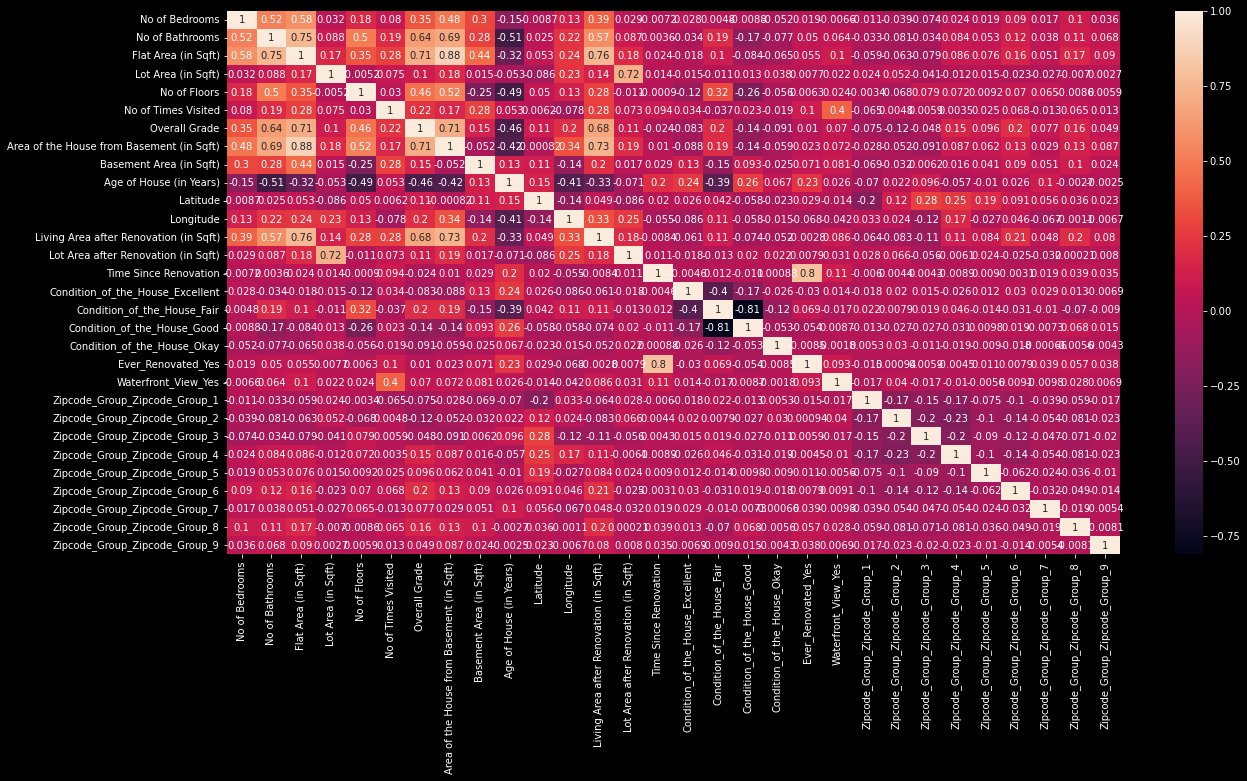

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [6]:
z = [[str(i),str(j)] for i in corr.columns for j in corr.columns if (corr.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# CALCULATING VIF

In [7]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Time Since Renovation                           2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [8]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [9]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [10]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [11]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Time Since Renovation                        2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

# TRAIN TEST SET

In [12]:
X = scaler.fit_transform(data.drop(columns = ['Sale_Price','ID','Flat Area (in Sqft)','Condition_of_the_House_Fair']))
Y = data['Sale_Price']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17287, 28), (4322, 28), (17287,), (4322,))

# BUILDING MODEL

# LINEAR REGRESSION

In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)#Gradient Descent

LinearRegression(normalize=True)

In [15]:
lr.coef_

array([ -3732.53695299,  12131.1539463 ,  14202.5332894 ,   3310.88999462,
        27578.20376315,  57496.97069571,  80029.15121244,  28154.44461146,
        27724.38936858,  23015.48803162, -23608.9370397 ,  19930.3769894 ,
        -3045.94329705, -12003.32332148,  14677.93456146,   5610.36070917,
        -2001.1431225 ,  16020.29628138,   9142.13140986,  12104.87656387,
        33118.77686858,  60742.42339152,  79742.01774242,  50004.12978268,
        72808.0339117 ,  39943.0401304 ,  67583.41832278,  20729.82734358])

# PREDICTIONS OVER TEST AND TRAIN DATASET

In [16]:
from sklearn.metrics import r2_score
pred_train=lr.predict(x_train)
print("Linear Regression Training Accuracy :", r2_score(y_train,pred_train)*100)

Linear Regression Training Accuracy : 84.18028445766521


In [17]:
pred_test = lr.predict(x_test)
print("Linear Regression Testing Accuracy :", r2_score(y_test,pred_test)*100)

Linear Regression Testing Accuracy : 84.68288490317892


# RESIDUAL PLOT

In [18]:
residuals = pred_test - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':pred_test})
residual_table = residual_table.sort_values(by='predictions')

In [19]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

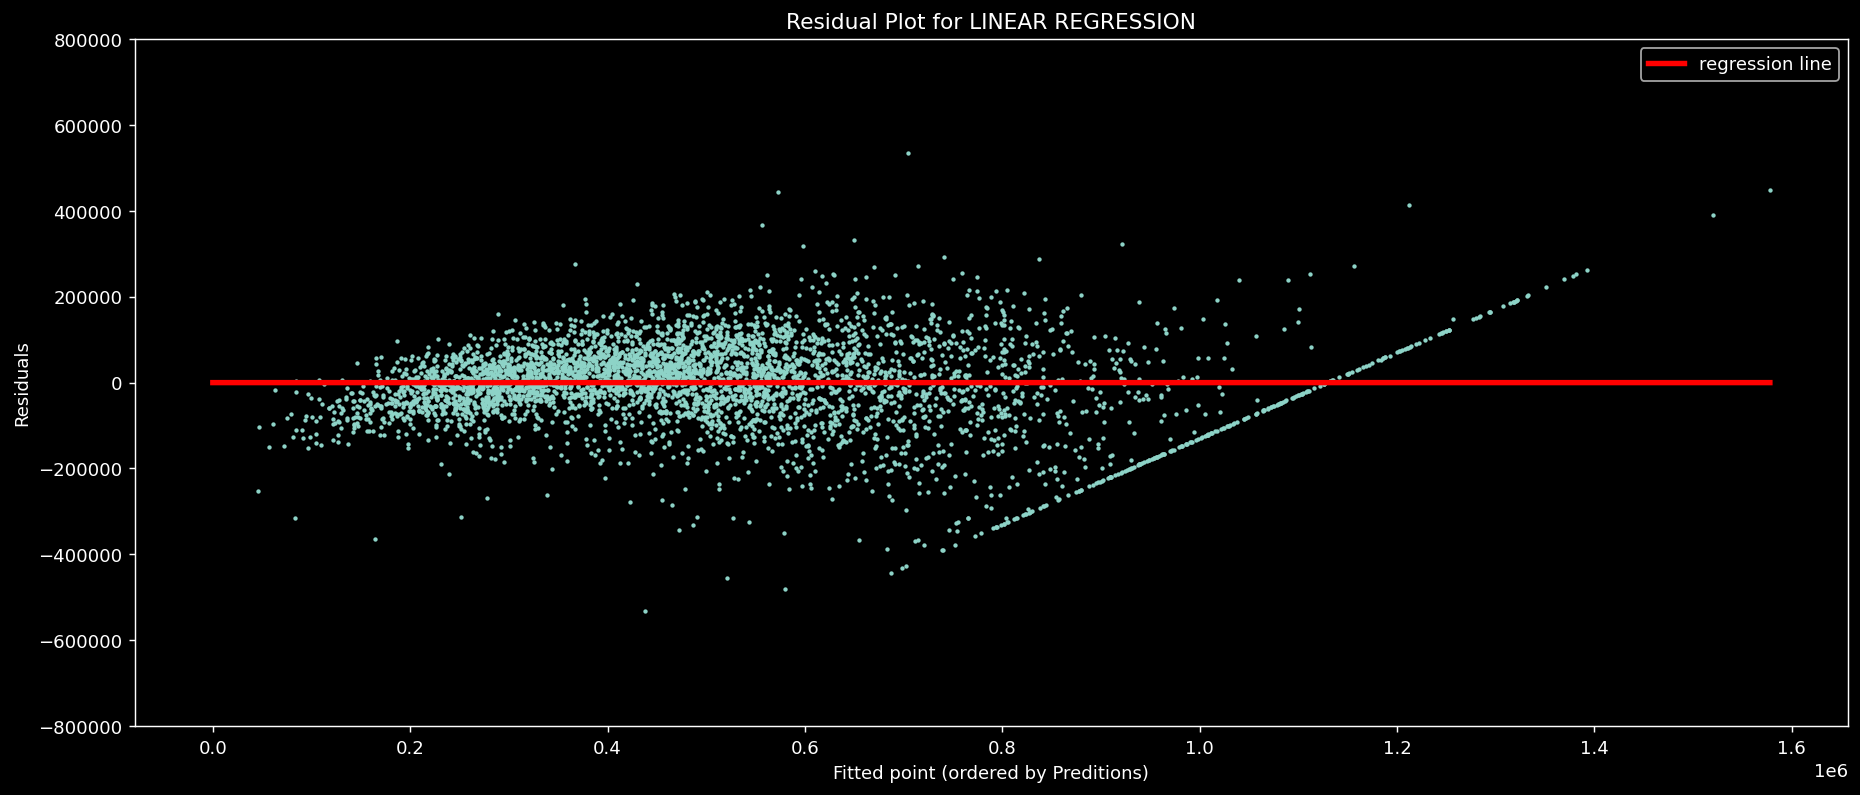

In [20]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], s = 2)
plt.plot( z, k, color='red', linewidth=3, label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot for LINEAR REGRESSION')
plt.legend()
plt.show()

# DISTRIBUTION OF ERROR

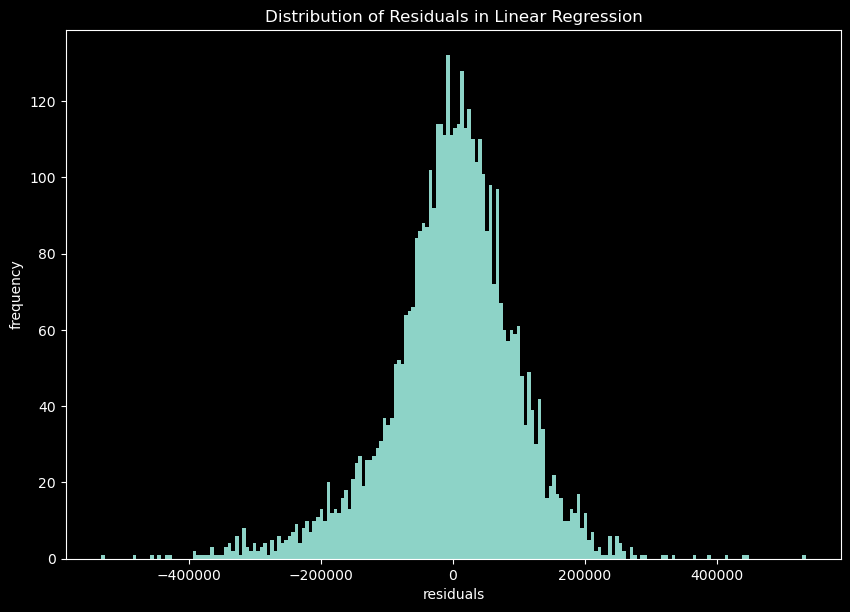

In [21]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'],bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals in Linear Regression')
plt.show()

# MODEL COEFFICIENTS

In [22]:
coeff_table = pd.DataFrame({'columns': vif_data.columns,'coefficients': lr.coef_})
coeff_table = coeff_table.sort_values(by = 'coefficients')


Text(0.5, 1.0, 'Normalized Coefficients plot')

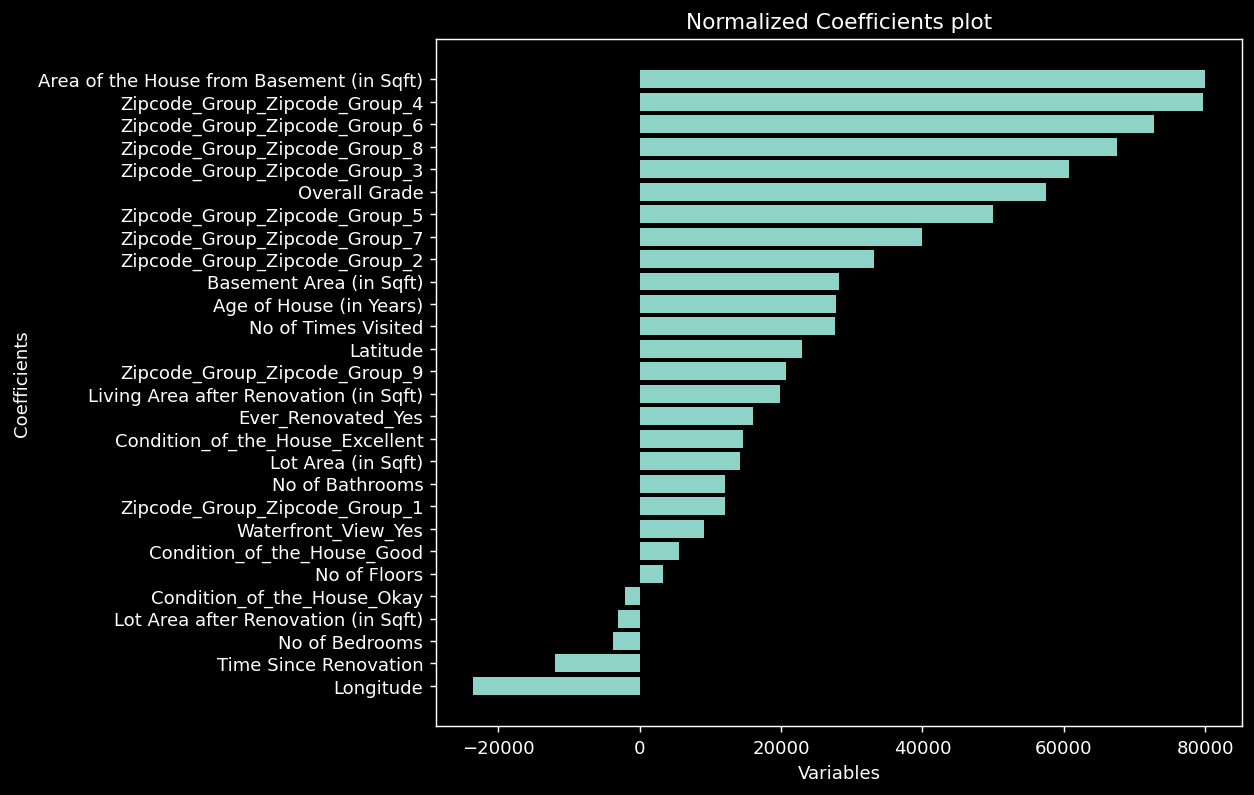

In [23]:
plt.figure(dpi=130, figsize=(8,7))
x=coeff_table['columns']
y=coeff_table['coefficients']
plt.barh(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficients plot')

# RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

# PREDICTIONS OVER TRAIN AND TEST DATASET

In [25]:
pred_train=reg.predict(x_train)
print("Random Forest Training Accuracy :", r2_score(y_train,pred_train)*100)

Random Forest Training Accuracy : 98.34537141382565


In [26]:
pred_test = reg.predict(x_test)
print("Random Forest Testing Accuracy :", r2_score(y_test,pred_test)*100)

Random Forest Testing Accuracy : 89.92382061486872


# RESIDUAL PLOT

In [27]:
residuals = pred_test - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':pred_test})
residual_table = residual_table.sort_values(by='predictions')

In [28]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

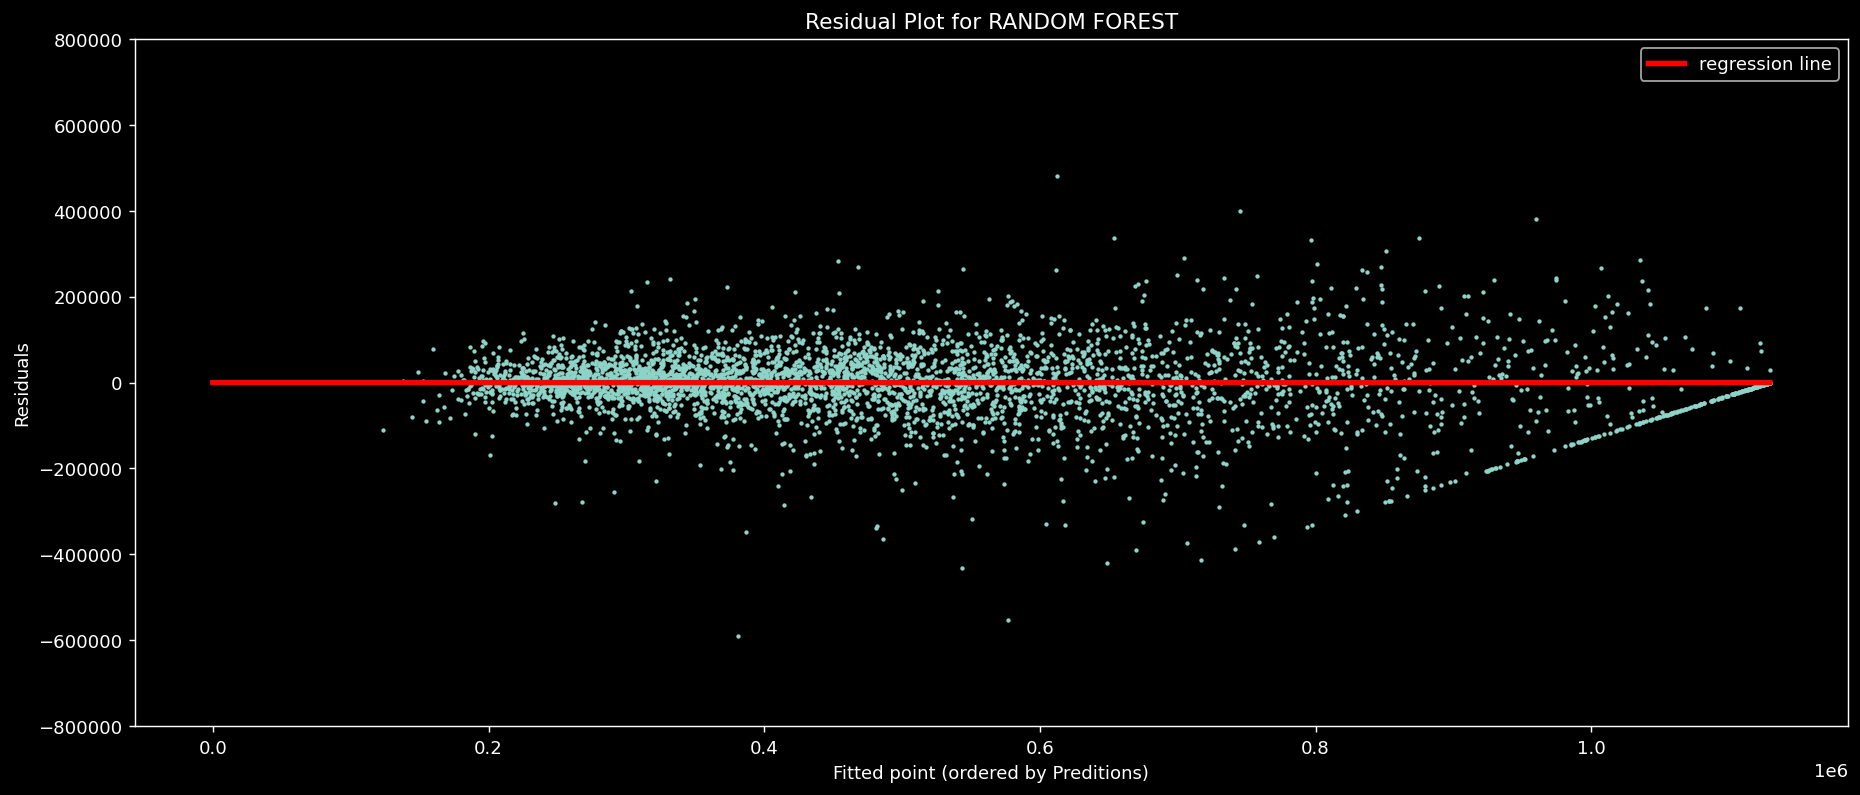

In [29]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], s = 2)
plt.plot( z, k, color='red', linewidth=3, label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot for RANDOM FOREST')
plt.legend()
plt.show()

# DISTRIBUTION OF ERROR

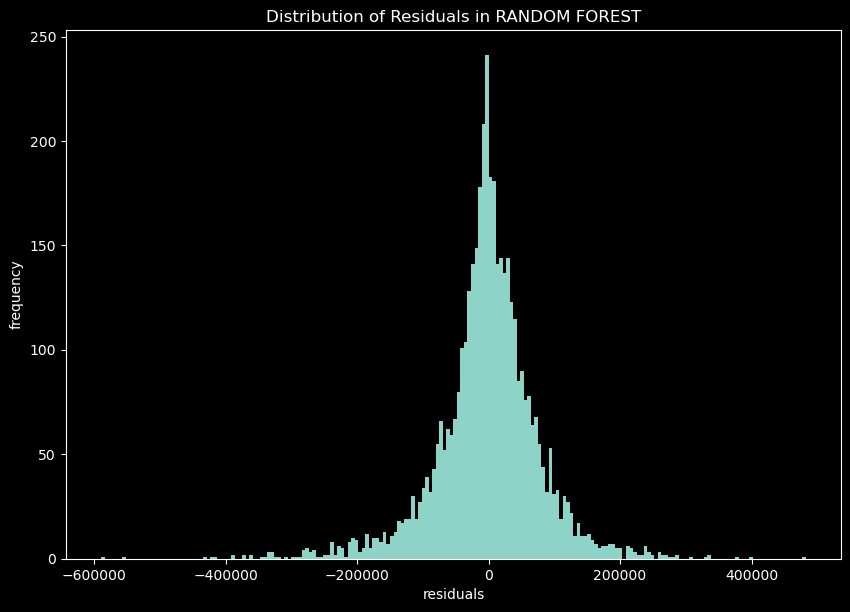

In [30]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'],bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals in RANDOM FOREST')
plt.show()

# XGBOOST 

In [31]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

# PREDICTIONS OVER TRAIN AND TEST DATASET

In [32]:
pred_train=xgb.predict(x_train)
print("XGBoost Training Accuracy :", r2_score(y_train,pred_train)*100)

XGBoost Training Accuracy : 82.92011950077749


In [33]:
pred_test=xgb.predict(x_test)
print("XGBoost Testing Accuracy :", r2_score(y_test,pred_test)*100)

XGBoost Testing Accuracy : 82.1991867653118


# RESIDUAL PLOT

In [34]:
residuals = pred_test - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':pred_test})
residual_table = residual_table.sort_values(by='predictions')

In [35]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

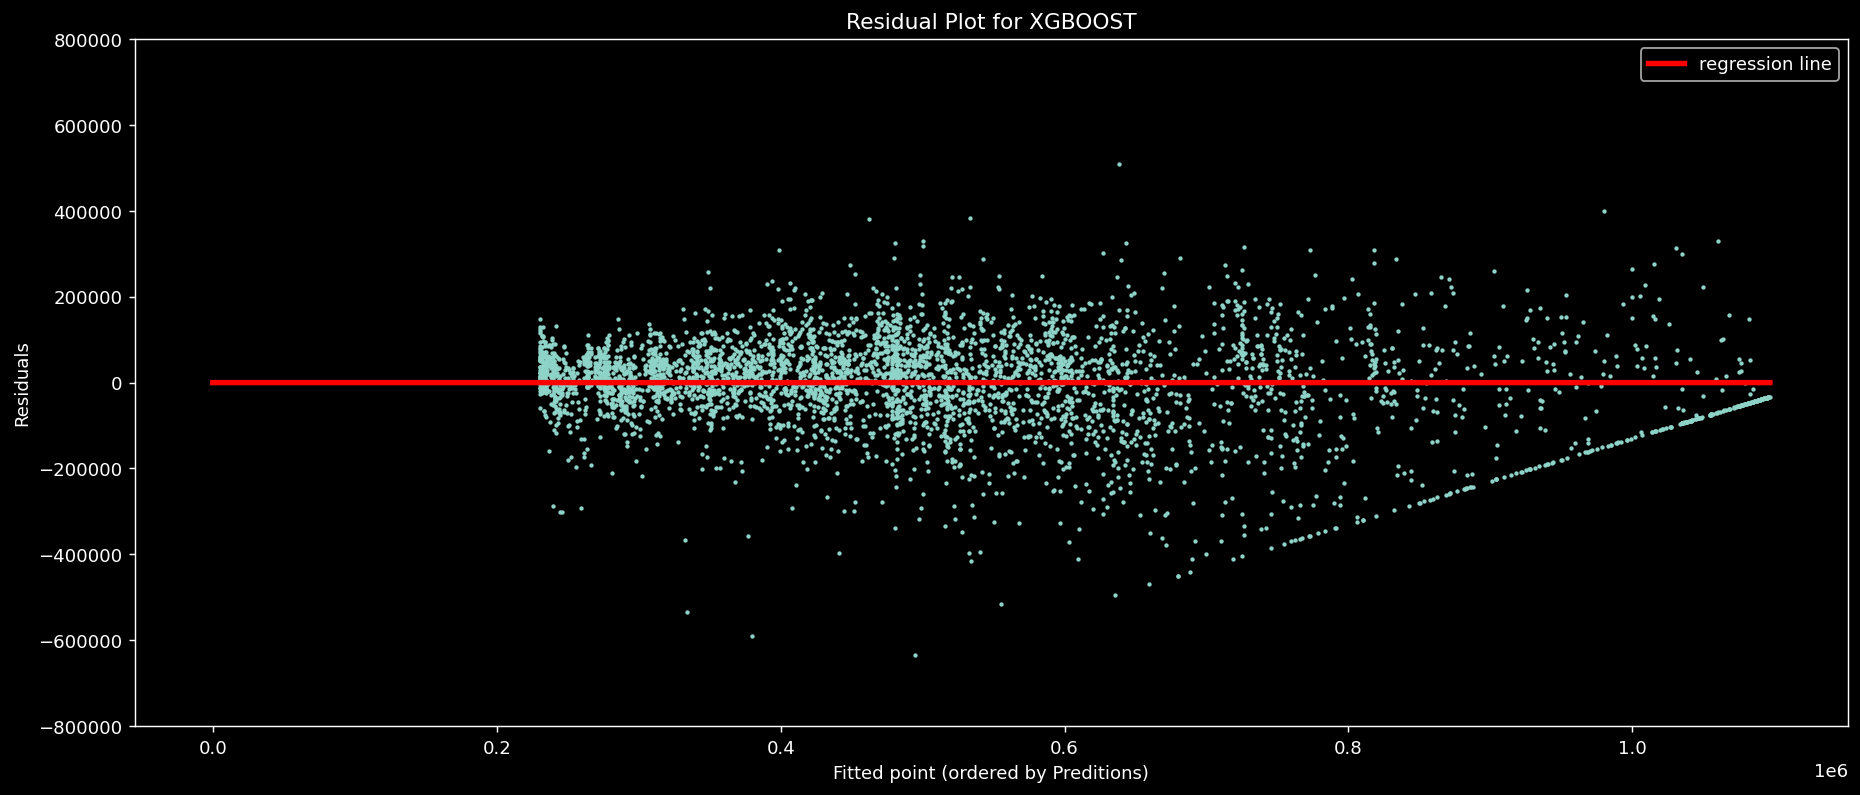

In [36]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], s = 2)
plt.plot( z, k, color='red', linewidth=3, label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBOOST')
plt.legend()
plt.show()

# DISTRIBUTION OF ERROR


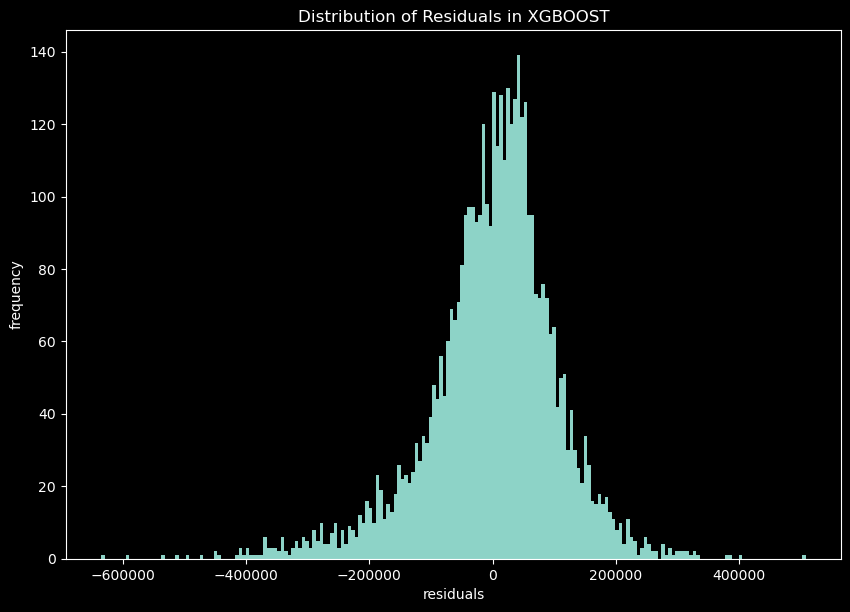

In [37]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'],bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals in XGBOOST')
plt.show()

# RESULT

On Evaluating the model using the above three methods, the results obtained are as follows:
1. Random Forest was more accurate with prediction accuracy of 89.92%*
2. Linear Regression comes next to Random Forest with accuracy of 84.68%
3. XBoost comes at last with accuracy of 82.19%

As Random Forest has the greatest accuracy we go with Random Forest for prediction.

# PREDICTOR


In [38]:
input = [[4,4.5,101930,1,0,10,3890,1530,17,47.6561,-122.005,4760,101930,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]]
output=reg.predict(scaler.transform(np.array(input)))
print("Predicted Price of the House : Rs",str(output)[1:-1])

Predicted Price of the House : Rs 1103181.83
